__Assignment - Week 2__

__Name__: Runze Li

__net id__: rl50xx

First, we pick __two linearly separable classes of data (Setosa and Versicolor)__ and apply the Perceptron and Adaline models to the classes. Based on step 4, 5 and 6, we can summarize the following table.

| Model | 2 features | 3 features | 4 features |
|:---:|:---:|:---:|:---:|
| Perceptron | 100.00% | 100.00% | 100.00% |
| Adaline | 100.00% | 100.00% | 100.00% |

Second, we pick __two nonlinearly separable classes of data (Versicolor and Virginica)__ and apply the Perceptron and Adaline models to the classes. Based on step 7, 8, and 9, we can summarize the following table.

| Model | 2 features | 3 features | 4 features |
|:---:|:---:|:---:|:---:|
| Perceptron | 89.00% | 90.00% | 97.00% |
| Adaline | 94.00% | 95.00% | 97.00% |

According to the above results, we can roughly see that the accuracy of the Adaline model in classification tasks is higher than that of the Perceptron model.

### __Step 1__. Download the sample Python code that comes with the assigned textbook, Python Machine Learning.

- The code is obtained from [Python Machine Learning book 3rd edition Chapter 2](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch02/ch02.ipynb).

### __Step 2__. Use the Iris dataset that's referenced in the text (Page 32).

#### __Attribute Information__:
- 0. sepal length in cm
- 1. sepal width in cm
- 2. petal length in cm
- 3. petal width in cm
- 4. class: Iris-setosa(0-49), Iris-versicolor(50-99), Iris-versicolor(100-149)

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load Iris Data

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None, encoding='utf-8')

#### Check linear separability of different classes using two features

In order to pick two classes of data which are linearly separable using two features (i.e. Sepal length and Petal length), we need to draw three pictures which shows linear separability of two different classes by choosing two from three classes.

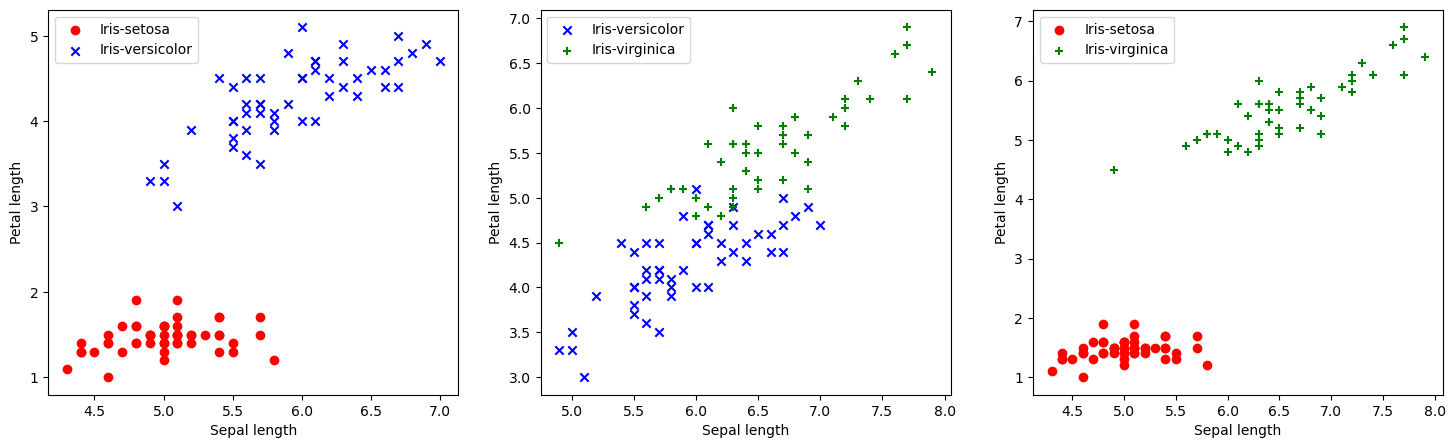

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Setosa vs Versicolor
y0 = df.iloc[0:100, 4].values
y0 = np.where(y0=='Iris-setosa', -1, 1)
x0 = df.iloc[0:100, [0, 2]].values
ax[0].scatter(x0[:50, 0], x0[:50, 1], color='red', marker='o', label='Iris-setosa')
ax[0].scatter(x0[50:100, 0], x0[50:100, 1], color='blue', marker='x', label='Iris-versicolor')
ax[0].set_xlabel('Sepal length')
ax[0].set_ylabel('Petal length')
ax[0].legend()

# Versicolor vs Virginica
y1 = df.iloc[50:150, 4].values
y1 = np.where(y1=='Iris-versicolor', -1, 1)
x1 = df.iloc[50:150, [0, 2]].values
ax[1].scatter(x1[:50, 0], x1[:50, 1], color='blue', marker='x', label='Iris-versicolor')
ax[1].scatter(x1[50:100, 0], x1[50:100, 1], color='green', marker='+', label='Iris-virginica')
ax[1].set_xlabel('Sepal length')
ax[1].set_ylabel('Petal length')
ax[1].legend()

# Setosa vs Virginica
y2 = df.iloc[0:50, 4].values
y3 = df.iloc[100:150, 4].values
x2 = df.iloc[0:50, [0, 2]].values
x3 = df.iloc[100:150, [0, 2]].values
ax[2].scatter(x2[:50, 0], x2[:50, 1], color='red', marker='o', label='Iris-setosa')
ax[2].scatter(x3[:50, 0], x3[:50, 1], color='green', marker='+', label='Iris-virginica')
ax[2].set_xlabel('Sepal length')
ax[2].set_ylabel('Petal length')
ax[2].legend()

According to three figures above, we find that __'setosa vs versicolor', 'setosa vs virginica' are both linearly separable__ using the features(sepal length and petal length), while __'versicolor vs virginica' is not linearly separable__.

As a result, we will use two classes of data __(Setosa and Versicolor)__ and two features __(sepal length and petal length)__ to get the result in Step 4. What's more, we will use two classes of data __(Versicolor and Virginica)__ and two features __(sepal length and petal length)__ to get the result in Step 7.

#### Check linear separability of different classes using three features

In order to pick two classes of data which are linearly separable using three features (i.e. Sepal length, Sepal Width and Petal length), we need to draw three pictures which shows linear separability of two different classes by choosing two from three classes.

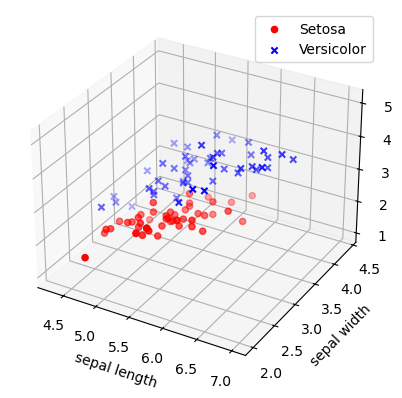

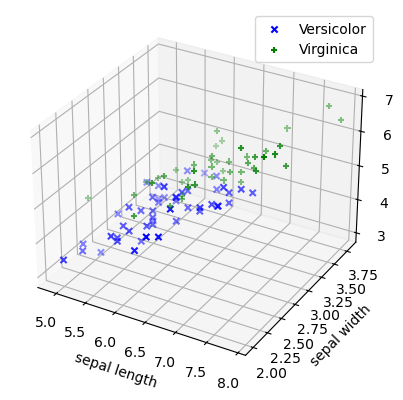

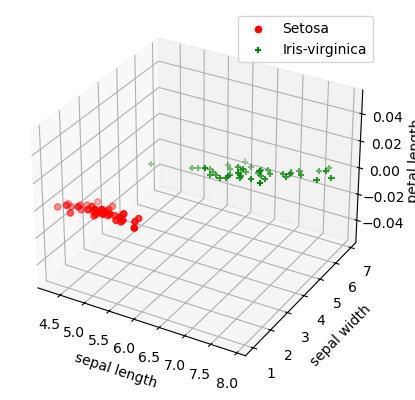

In [4]:
# Extract sepal length, sepal width and petal length
X = df.iloc[0:100, [0, 1, 2]].values

# Class: Setosa and Versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:50, 0], X[:50, 1], X[:50, 2], color='red', marker='o', label='Setosa')
ax.scatter3D(X[50:100, 0], X[50:100, 1], X[50:100, 2], color='blue', marker='x', label='Versicolor')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
ax.legend()

# Extract sepal length, sepal width and petal length
X = df.iloc[50:150, [0, 1, 2]].values

# Class: Versicolor and Virginica
y = df.iloc[50:150, 4].values
y = np.where(y == 'versicolor', -1, 1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:50, 0], X[:50, 1], X[:50, 2], color='blue', marker='x', label='Versicolor')
ax.scatter3D(X[50:100, 0], X[50:100, 1], X[50:100, 2], color='green', marker='+', label='Virginica')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
ax.legend()

# Extract sepal length, sepal width and petal length
x2 = df.iloc[0:50, [0, 2]].values
x3 = df.iloc[100:150, [0, 2]].values

# Class: Setosa and Virginica
y2 = df.iloc[0:50, 4].values
y3 = df.iloc[100:150, 4].values

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x2[:50, 0], x2[:50, 1], color='red', marker='o', label='Setosa')
ax.scatter(x3[:50, 0], x3[:50, 1], color='green', marker='+', label='Iris-virginica')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
ax.legend()

According to three figures above, we find that __'setosa vs versicolor', 'setosa vs virginica' are both linearly separable__ using three features(sepal length, sepal width and petal length), while __'versicolor vs virginica' is not linearly separable__.

As a result, we will use two classes of data __(Setosa and Versicolor)__ and three features (sepal length, sepal width and petal length) to get the result in Step 5. What's more, we will use two classes of data __(Versicolor and Virginica)__ and three features (sepal length, sepal width and petal length) to get the result in Step 8.

### __Step 3__. You can use the sample code from the  text as a starting point or you can write your own code from scratch.

### __Step 4__. Pick two classes of data (Setosa and Versicolor) and two features from the four in the dataset (sepal length and petal length), so that the data for two species are linearly separable using the features that you have chosen.

#### Apply the Perceptron model (Page 27)

In [5]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

#### Apply the Adaline model (Page 40)

In [6]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

#### Pick two classes of data (Setosa and Versicolor) and two features (sepal length and petal length)

In [7]:
from sklearn.preprocessing import StandardScaler

# Class: Setosa and Versicolor
y_2features_linear = df.iloc[0:100, 4].values
y_2features_linear = np.where(y_2features_linear=='Iris-setosa', -1, 1)

# Features: Sepal length and Petal length
x_2features_linear = df.iloc[0:100, [0, 2]].values

# Preprocessing
scaler = StandardScaler()
x_2features_linear = scaler.fit_transform(x_2features_linear)

# Using Perceptron model
perceptron = Perceptron(eta=0.1, n_iter=10)
perceptron.fit(x_2features_linear, y_2features_linear)

# Using Adaline model
adaline = AdalineGD(eta=0.01, n_iter=50)
adaline.fit(x_2features_linear, y_2features_linear)

In [8]:
# This function is used to calculate the accuracy of training model.
def accuracy(y, prediction):
    return np.mean(y==prediction)

In [9]:
# Print out results

y_perceptron_2features_linear_prediction = perceptron.predict(x_2features_linear)
accuracy_perceptron_2features_linear = accuracy(y_2features_linear, y_perceptron_2features_linear_prediction)
accuracy_perceptron_2features_linear = "{:.2%}".format(accuracy_perceptron_2features_linear)
print("Perceptron - 2 features - linear: " + accuracy_perceptron_2features_linear)

y_adaline_2features_linear_prediction = adaline.predict(x_2features_linear)
accuracy_adaline_2features_linear = accuracy(y_2features_linear, y_adaline_2features_linear_prediction)
accuracy_adaline_2features_linear = "{:.2%}".format(accuracy_adaline_2features_linear)
print("Adaline - 2 features - linear: " + accuracy_adaline_2features_linear)

Perceptron - 2 features - linear: 100.00%
Adaline - 2 features - linear: 100.00%


#### A function for plotting decision regions (Page 34)

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
#     cmap = ListedColormap(colors[:len(np.unique(y))])
    cmap = ListedColormap(['red', 'blue', 'lightgreen', 'gray', 'cyan'])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

C:\Users\Lirz3\AppData\Local\Temp\ipykernel_19560\3727108406.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


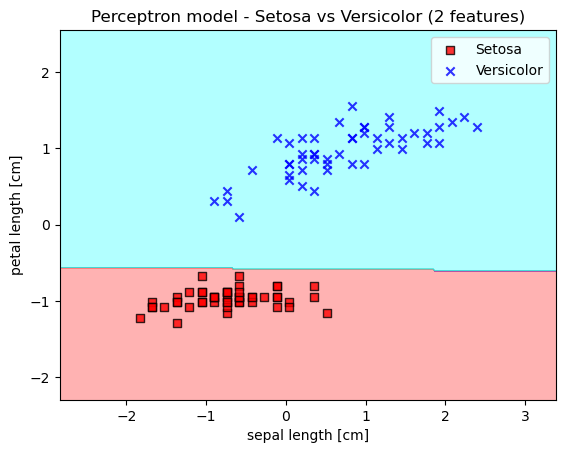

In [11]:
y_2features_linear = df.iloc[0:100, 4].values
y_2features_linear = np.where(y_2features_linear=='Iris-setosa', -1, 1)
x_2features_linear = df.iloc[0:100, [0, 2]].values

scaler = StandardScaler()
x_2features_linear = scaler.fit_transform(x_2features_linear)

perceptron = Perceptron(eta=0.1, n_iter=10)
perceptron.fit(x_2features_linear, y_2features_linear)

# Plotting decision regions
plot_decision_regions(x_2features_linear, y_2features_linear, classifier=perceptron)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Perceptron model - Setosa vs Versicolor (2 features)')
legend = plt.legend()
legend.get_texts()[0].set_text("Setosa")
legend.get_texts()[1].set_text("Versicolor")

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

C:\Users\Lirz3\AppData\Local\Temp\ipykernel_19560\3727108406.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


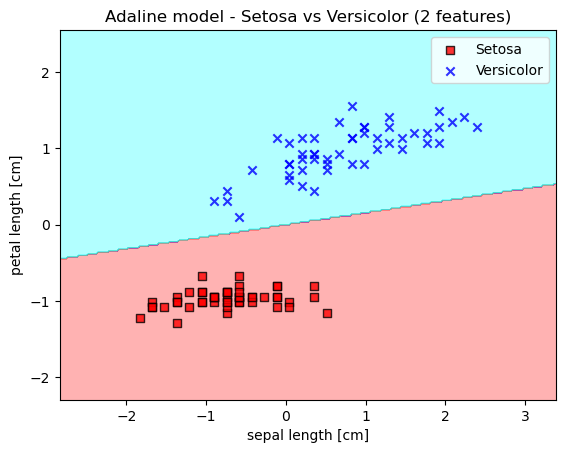

In [12]:
y_2features_linear = df.iloc[0:100, 4].values
y_2features_linear = np.where(y_2features_linear=='Iris-setosa', -1, 1)
x_2features_linear = df.iloc[0:100, [0, 2]].values

scaler = StandardScaler()
x_2features_linear = scaler.fit_transform(x_2features_linear)

adaline = AdalineGD(eta=0.01, n_iter=50)
adaline.fit(x_2features_linear, y_2features_linear)

# Plotting decision regions
plot_decision_regions(x_2features_linear, y_2features_linear, classifier=adaline)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Adaline model - Setosa vs Versicolor (2 features)')
legend = plt.legend()
legend.get_texts()[0].set_text("Setosa")
legend.get_texts()[1].set_text("Versicolor")

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

### __Step 5__. Repeat Step 4) using three features (sepal length, sepal width and petal length) at a time.

In [13]:
# Class: Setosa and Versicolor
y_3features_linear = df.iloc[0:100, 4].values
y_3features_linear = np.where(y_3features_linear=='Iris-setosa', -1, 1)

# Feature: Sepal length, Sepal width and Petal length
x_3features_linear = df.iloc[0:100, [0, 1, 2]].values
x_3features_linear = scaler.fit_transform(x_3features_linear)

perceptron3 = Perceptron(eta=0.01, n_iter=100)
perceptron3.fit(x_3features_linear, y_3features_linear)

adaline3 = AdalineGD(eta=0.001, n_iter=100)
adaline3.fit(x_3features_linear, y_3features_linear)

In [14]:
y_perceptron_3features_linear_prediction = perceptron3.predict(x_3features_linear)
accuracy_perceptron_3features_linear = accuracy(y_3features_linear, y_perceptron_3features_linear_prediction)
accuracy_perceptron_3features_linear = "{:.2%}".format(accuracy_perceptron_3features_linear)
print("Perceptron - 3 features - linear: " + accuracy_perceptron_3features_linear)

y_adaline_3features_linear_prediction = adaline3.predict(x_3features_linear)
accuracy_adaline_3features_linear = accuracy(y_3features_linear, y_adaline_3features_linear_prediction)
accuracy_adaline_3features_linear = "{:.2%}".format(accuracy_adaline_3features_linear)
print("Adaline - 3 features - linear: " + accuracy_adaline_3features_linear)

Perceptron - 3 features - linear: 100.00%
Adaline - 3 features - linear: 100.00%


### __Step 6__. Repeat Step 4) using all four features (sepal length, sepal width, petal length and petal width) at the same time.

In [15]:
y_4features_linear = df.iloc[0:100, 4].values
y_4features_linear = np.where(y_4features_linear=='Iris-setosa', -1, 1)

# All features
x_4features_linear = df.iloc[0:100, [0, 1, 2, 3]].values
x_4features_linear = scaler.fit_transform(x_4features_linear)

perceptron4 = Perceptron(eta=0.01, n_iter=100)
perceptron4.fit(x_4features_linear, y_4features_linear)

adaline4 = AdalineGD(eta=0.001, n_iter=100)
adaline4.fit(x_4features_linear, y_4features_linear)

In [16]:
y_perceptron_4features_linear_prediction = perceptron4.predict(x_4features_linear)
accuracy_perceptron_4features_linear = accuracy(y_4features_linear, y_perceptron_4features_linear_prediction)
accuracy_perceptron_4features_linear = "{:.2%}".format(accuracy_perceptron_4features_linear)
print("Perceptron - 4 features - linear: " + accuracy_perceptron_4features_linear)

y_adaline_4features_linear_prediction = adaline4.predict(x_4features_linear)
accuracy_adaline_4features_linear = accuracy(y_4features_linear, y_adaline_4features_linear_prediction)
accuracy_adaline_4features_linear = "{:.2%}".format(accuracy_adaline_4features_linear)
print("Adaline - 4 features - linear: " + accuracy_adaline_4features_linear)

Perceptron - 4 features - linear: 100.00%
Adaline - 4 features - linear: 100.00%


### __Step 7__. Pick two classes of data (Versicolor and Virginica) and two features from the four in the dataset (sepal length and petal length), so that the data for two species are linearly separable using the features that you have chosen.

In [17]:
# Class: Versicolor and Virginica
y_2features_nonlinear = df.iloc[50:150, 4].values
y_2features_nonlinear = np.where(y_2features_nonlinear=='Iris-versicolor', -1, 1)

# Feature: Sepal length and Petal length
x_2features_nonlinear = df.iloc[50:150, [0, 2]].values
x_2features_nonlinear = scaler.fit_transform(x_2features_nonlinear)

perceptron = Perceptron(eta=0.1, n_iter=10)
perceptron.fit(x_2features_nonlinear, y_2features_nonlinear)

adaline = AdalineGD(eta=0.01, n_iter=50)
adaline.fit(x_2features_nonlinear, y_2features_nonlinear)

y_perceptron_2features_nonlinear_prediction = perceptron.predict(x_2features_nonlinear)
accuracy_perceptron_2features_nonlinear = accuracy(y_2features_nonlinear, y_perceptron_2features_nonlinear_prediction)
accuracy_perceptron_2features_nonlinear = "{:.2%}".format(accuracy_perceptron_2features_nonlinear)
print("Perceptron - 2 features - nonlinear: " + accuracy_perceptron_2features_nonlinear)

y_adaline_2features_nonlinear_prediction = adaline.predict(x_2features_nonlinear)
accuracy_adaline_2features_nonlinear = accuracy(y_2features_nonlinear, y_adaline_2features_nonlinear_prediction)
accuracy_adaline_2features_nonlinear = "{:.2%}".format(accuracy_adaline_2features_nonlinear)
print("Adaline - 2 features - nonlinear: " + accuracy_adaline_2features_nonlinear)

Perceptron - 2 features - nonlinear: 89.00%
Adaline - 2 features - nonlinear: 94.00%


C:\Users\Lirz3\AppData\Local\Temp\ipykernel_19560\3727108406.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


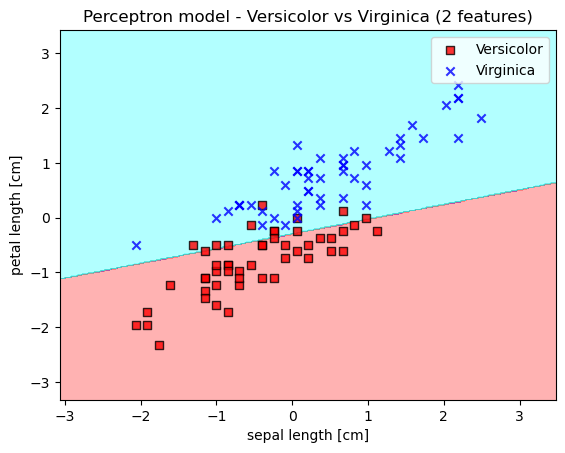

In [18]:
y_2features_nonlinear = df.iloc[50:150, 4].values
y_2features_nonlinear = np.where(y_2features_nonlinear=='Iris-versicolor', -1, 1)
x_2features_nonlinear = df.iloc[50:150, [0, 2]].values
x_2features_nonlinear = scaler.fit_transform(x_2features_nonlinear)

perceptron = Perceptron(eta=0.1, n_iter=10)
perceptron.fit(x_2features_nonlinear, y_2features_nonlinear)

plot_decision_regions(x_2features_nonlinear, y_2features_nonlinear, classifier=perceptron)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Perceptron model - Versicolor vs Virginica (2 features)')
legend = plt.legend()
legend.get_texts()[0].set_text("Versicolor")
legend.get_texts()[1].set_text("Virginica")

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

C:\Users\Lirz3\AppData\Local\Temp\ipykernel_19560\3727108406.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


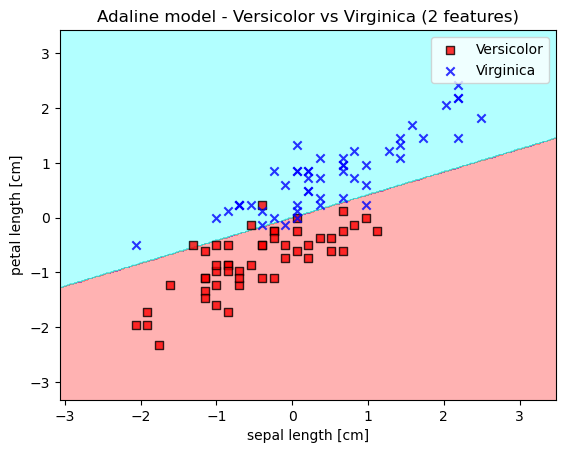

In [19]:
adaline = AdalineGD(eta=0.01, n_iter=50)
adaline.fit(x_2features_nonlinear, y_2features_nonlinear)

plot_decision_regions(x_2features_nonlinear, y_2features_nonlinear, classifier=adaline)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Adaline model - Versicolor vs Virginica (2 features)')
legend = plt.legend()
legend.get_texts()[0].set_text("Versicolor")
legend.get_texts()[1].set_text("Virginica")

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

### __Step 8__. Repeat Step 7) using three features (sepal length, sepal width and petal length) at a time.

In [20]:
# Class: Versicolor and Virginica
y_3features_nonlinear = df.iloc[50:150, 4].values
y_3features_nonlinear = np.where(y_3features_nonlinear=='Iris-versicolor', -1, 1)

# Feature: Sepal length, Sepal width and Petal length
x_3features_nonlinear = df.iloc[50:150, [0, 1, 2]].values
x_3features_nonlinear = scaler.fit_transform(x_3features_nonlinear)

perceptron3 = Perceptron(eta=0.01, n_iter=100)
perceptron3.fit(x_3features_nonlinear, y_3features_nonlinear)

adaline3 = AdalineGD(eta=0.001, n_iter=100)
adaline3.fit(x_3features_nonlinear, y_3features_nonlinear)

In [21]:
y_perceptron_3features_nonlinear_prediction = perceptron3.predict(x_3features_nonlinear)
accuracy_perceptron_3features_nonlinear = accuracy(y_3features_nonlinear, y_perceptron_3features_nonlinear_prediction)
accuracy_perceptron_3features_nonlinear = "{:.2%}".format(accuracy_perceptron_3features_nonlinear)
print("Perceptron - 3 features - nonlinear: " + accuracy_perceptron_3features_nonlinear)

y_adaline_3features_nonlinear_prediction = adaline3.predict(x_3features_nonlinear)
accuracy_adaline_3features_nonlinear = accuracy(y_3features_nonlinear, y_adaline_3features_nonlinear_prediction)
accuracy_adaline_3features_nonlinear = "{:.2%}".format(accuracy_adaline_3features_nonlinear)
print("Adaline - 3 features - nonlinear: " + accuracy_adaline_3features_nonlinear)

Perceptron - 3 features - nonlinear: 90.00%
Adaline - 3 features - nonlinear: 95.00%


### __Step 9__. Repeat Step 7) using all four features (sepal length, sepal width, petal length and petal width) at the same time.

In [22]:
y_4features_nonlinear = df.iloc[50:150, 4].values
y_4features_nonlinear = np.where(y_4features_nonlinear=='Iris-versicolor', -1, 1)

# All features
x_4features_nonlinear = df.iloc[50:150, [0, 1, 2, 3]].values
x_4features_nonlinear = scaler.fit_transform(x_4features_nonlinear)

perceptron4 = Perceptron(eta=0.01, n_iter=100)
perceptron4.fit(x_4features_nonlinear, y_4features_nonlinear)

adaline4 = AdalineGD(eta=0.001, n_iter=100)
adaline4.fit(x_4features_nonlinear, y_4features_nonlinear)

In [23]:
y_perceptron_4features_nonlinear_prediction = perceptron4.predict(x_4features_nonlinear)
accuracy_perceptron_4features_nonlinear = accuracy(y_4features_nonlinear, y_perceptron_4features_nonlinear_prediction)
accuracy_perceptron_4features_nonlinear = "{:.2%}".format(accuracy_perceptron_4features_nonlinear)
print("Perceptron - 4 features - nonlinear: " + accuracy_perceptron_4features_nonlinear)

y_adaline_4features_nonlinear_prediction = adaline4.predict(x_4features_nonlinear)
accuracy_adaline_4features_nonlinear = accuracy(y_4features_nonlinear, y_adaline_4features_nonlinear_prediction)
accuracy_adaline_4features_nonlinear = "{:.2%}".format(accuracy_adaline_4features_nonlinear)
print("Adaline - 4 features - nonlinear: " + accuracy_adaline_4features_nonlinear)

Perceptron - 4 features - nonlinear: 97.00%
Adaline - 4 features - nonlinear: 97.00%


### __Step 10__. Compare your results for the Perceptron and Adaline models.

First, we pick __two linearly separable classes of data (Setosa and Versicolor)__ and apply the Perceptron and Adaline models to the classes. Based on step 4, 5 and 6, we can summarize the following table.

| Model | 2 features | 3 features | 4 features |
|:---:|:---:|:---:|:---:|
| Perceptron | 100.00% | 100.00% | 100.00% |
| Adaline | 100.00% | 100.00% | 100.00% |

Second, we pick __two nonlinearly separable classes of data (Versicolor and Virginica)__ and apply the Perceptron and Adaline models to the classes. Based on step 7, 8, and 9, we can summarize the following table.

| Model | 2 features | 3 features | 4 features |
|:---:|:---:|:---:|:---:|
| Perceptron | 89.00% | 90.00% | 97.00% |
| Adaline | 94.00% | 95.00% | 97.00% |

According to the above results, we can roughly see that the accuracy of the Adaline model in classification tasks is higher than that of the Perceptron model.

### __Step 11__. Submit your results as an ipython notebook (i.e. in ipynb format).